In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [9]:
#link: https://www.kaggle.com/datasets/hassanamin/textdb3 # words preprocess
news_df = pd.read_csv("/kaggle/input/textdb3/fake_or_real_news.csv")
stop_words = stopwords.words('english')
filtered_text = []
for i in news_df["text"]:
    i = re.sub("\d", " ", i)
    i = re.sub('[%s]' % re.escape(string.punctuation), ' ', i)
    i = re.sub('\n', ' ', i)
    i = re.sub('\s{2,}', " ", i)
    text_tokens = word_tokenize(i)
    for w in text_tokens:
        if w not in stop_words:
            filtered_text.append(w)

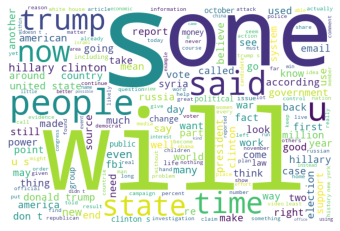

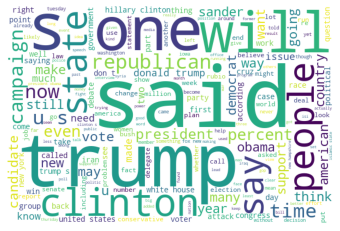

In [10]:
# vizualization
def visualize(label):
    text = ''
    for msg in news_df[news_df['label'] == label]['text']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
visualize("FAKE")
visualize("REAL")

In [13]:
# tokenezation
X_train, X_test, y_train, y_test = train_test_split(news_df['text'], news_df['label'], test_size=0.20)
tfidf_vectorizer = TfidfVectorizer(max_df=500, min_df=10)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test =  tfidf_vectorizer.transform(X_test)

# clasification 
clf = MultinomialNB(alpha=0.1)
clf.fit(tfidf_train, y_train)
y_pred = clf.predict(tfidf_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        FAKE       0.85      0.90      0.87       625
        REAL       0.89      0.85      0.87       642

    accuracy                           0.87      1267
   macro avg       0.87      0.87      0.87      1267
weighted avg       0.87      0.87      0.87      1267

